Random Forest Scenario Classification for Autonomous Driving

In [40]:
import pandas as pd
import seaborn as sns
import glob

In [50]:
df = pd.DataFrame()
filenames = glob.glob("data\_overtake*.csv")
count = 0
for file in filenames:
    df2 = pd.read_csv(f"data\_overtake{count}.csv", skiprows=1)
    df2['instance'] = count
    df = df.append(df2)
    count+=1
df.shape

(9600, 28)

In [51]:
df.columns = [x.replace(' ', '') for x in df.columns]
features = ['time', 'id', 'x', 'y', 'h', 'laneId', 'instance']
df = df[features]
df['scenario'] = 'overtake'
df.head(10)

,time,id,x,y,h,laneId,instance,scenario
0,0.0,0,10.00,-1.5,0.0,-1,0,overtake
1,0.0,1,-0.00,-4.5,0.0,-2,0,overtake
2,0.1,0,11.00,-1.5,0.0,-1,0,overtake
3,0.1,1,1.25,-4.5,0.0,-2,0,overtake
4,0.2,0,12.00,-1.5,0.0,-1,0,overtake
5,0.2,1,2.50,-4.5,0.0,-2,0,overtake
6,0.3,0,13.00,-1.5,0.0,-1,0,overtake
7,0.3,1,3.75,-4.5,0.0,-2,0,overtake
8,0.4,0,14.00,-1.5,0.0,-1,0,overtake
9,0.4,1,5.00,-4.5,0.0,-2,0,overtake


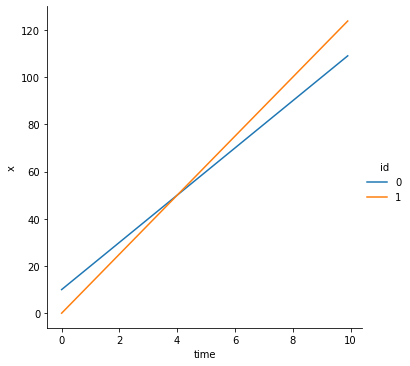

In [35]:
g = sns.relplot(x='time', y='x', data=df, hue='id', kind='line')

In [33]:
df.describe()

,time,id,x,y,h,laneId
count,200.000000,200.000000,200.000000,200.000000,200.0,200.000000
mean,4.950000,0.500000,60.687500,-3.000000,0.0,-1.500000
std,2.893851,0.501255,32.777792,1.503764,0.0,0.501255
min,0.000000,0.000000,-0.000000,-4.500000,0.0,-2.000000
25%,2.475000,0.000000,32.875000,-4.500000,0.0,-2.000000
50%,4.950000,0.500000,60.500000,-3.000000,0.0,-1.500000
75%,7.425000,1.000000,88.187500,-1.500000,0.0,-1.000000
max,9.900000,1.000000,123.750000,-1.500000,0.0,-1.000000
